# Step1: DataCleaning and Preprocessing

In [ ]:
# from google.colab import files

# uploaded = files.upload()


Saving FSI-Firepoints-100625 Goa.csv to FSI-Firepoints-100625 Goa.csv
Saving GOA_AWS_IMD_data.csv to GOA_AWS_IMD_data (1).csv


## (i) Convert DMS to Decimal Degrees

In [ ]:
import pandas as pd

def dms_to_dd(dms_str):
    try:
        d, m, s = dms_str.replace('¬∞', ' ').replace("'", ' ').replace('"', ' ').split()[:3]
        dd = float(d) + float(m)/60 + float(s)/3600
        return dd
    except:
        return None

# Load fire data
fire_df = pd.read_csv('/content/FSI-Firepoints-100625 Goa.csv', encoding='latin-1')
fire_df['Latitude_dd'] = fire_df['Latitude'].apply(dms_to_dd)
fire_df['Longitude_dd'] = fire_df['Longitude'].apply(dms_to_dd)
fire_df['Datetime'] = pd.to_datetime(fire_df['Fire Date'] + ' ' + fire_df['Fire Time'], errors='coerce')
fire_df.dropna(subset=['Datetime', 'Latitude_dd', 'Longitude_dd'], inplace=True)

fire_df.head()

Fire Date Fire Time Source      Latitude     Longitude State   District  \
0  2021-11-11  02:07:15   SNPP  15¬∞ 16' 41"N  74¬∞ 08' 52"E   GOA  SOUTH GOA   
1  2021-12-03  01:54:57   SNPP  15¬∞ 16' 42"N  74¬∞ 08' 52"E   GOA  SOUTH GOA   
2  2021-12-17  02:32:19   SNPP  15¬∞ 22' 22"N  74¬∞ 08' 28"E   GOA  SOUTH GOA   
3  2021-12-18  02:13:23   SNPP  15¬∞ 16' 38"N  74¬∞ 08' 58"E   GOA  SOUTH GOA   
4  2022-01-11  14:12:49   SNPP  15¬∞ 44' 51"N  73¬∞ 52' 45"E   GOA  NORTH GOA   

              Circle                       Division          Range  \
0  TERITORIAL CIRCLE  SOUTH GOA TERITORIAL DIVISION  SANGUEM RANGE   
1  TERITORIAL CIRCLE  SOUTH GOA TERITORIAL DIVISION  SANGUEM RANGE   
2  TERITORIAL CIRCLE  NORTH GOA TERITORIAL DIVISION    COLEM RANGE   
3  TERITORIAL CIRCLE  SOUTH GOA TERITORIAL DIVISION  SANGUEM RANGE   
4  TERITORIAL CIRCLE  NORTH GOA TERITORIAL DIVISION   PERNEM RANGE   

  Block/Section/Round            Beat  Forest Block  Compartment No  \
0      KIRLAPAL BLOCK  SANVORDEM BEAT           NaN             NaN   
1      KIRLAPAL BLOCK  SANVORDEM BEAT           NaN             NaN   
2   DHARBANDORA BLOCK   TATODI 2 BEAT           NaN             NaN   
3      KIRLAPAL BLOCK  SANVORDEM BEAT           NaN             NaN   
4        PERNEM BLOCK    CHANDEL BEAT           NaN             NaN   

   Unnamed: 14  Latitude_dd  Longitude_dd            Datetime  
0          NaN    15.278056     74.147778 2021-11-11 02:07:15  
1          NaN    15.278333     74.147778 2021-12-03 01:54:57  
2          NaN    15.372778     74.141111 2021-12-17 02:32:19  
3          NaN    15.277222     74.149444 2021-12-18 02:13:23  
4          NaN    15.747500     73.879167 2022-01-11 14:12:49

# Step2: Spatial Join (shapeFile)

In [ ]:
# Upload shapefile (as .zip) and extract

In [ ]:
import zipfile
import geopandas as gpd
import pandas as pd

# Extract ZIP file
with zipfile.ZipFile("/content/shp.zip", 'r') as zip_ref:
    zip_ref.extractall("goa_shp")


# Load shapefile explicitly
gdf_boundary = gpd.read_file("goa_shp/shp/Protect_area.shp")



# Convert fire_df to GeoDataFrame
gdf_fire = gpd.GeoDataFrame(
    fire_df,
    geometry=gpd.points_from_xy(fire_df['Longitude_dd'], fire_df['Latitude_dd']),
    crs="EPSG:4326"
)

# Ensure CRS match
gdf_boundary = gdf_boundary.to_crs("EPSG:4326")

# Perform spatial join
joined = gpd.sjoin(gdf_fire, gdf_boundary, how="left", predicate='intersects')

# Display joined data
print(joined.head())


    Fire Date Fire Time Source      Latitude     Longitude State_left  \
0  2021-11-11  02:07:15   SNPP  15¬∞ 16' 41"N  74¬∞ 08' 52"E        GOA   
1  2021-12-03  01:54:57   SNPP  15¬∞ 16' 42"N  74¬∞ 08' 52"E        GOA   
2  2021-12-17  02:32:19   SNPP  15¬∞ 22' 22"N  74¬∞ 08' 28"E        GOA   
3  2021-12-18  02:13:23   SNPP  15¬∞ 16' 38"N  74¬∞ 08' 58"E        GOA   
4  2022-01-11  14:12:49   SNPP  15¬∞ 44' 51"N  73¬∞ 52' 45"E        GOA   

    District             Circle                       Division          Range  \
0  SOUTH GOA  TERITORIAL CIRCLE  SOUTH GOA TERITORIAL DIVISION  SANGUEM RANGE   
1  SOUTH GOA  TERITORIAL CIRCLE  SOUTH GOA TERITORIAL DIVISION  SANGUEM RANGE   
2  SOUTH GOA  TERITORIAL CIRCLE  NORTH GOA TERITORIAL DIVISION    COLEM RANGE   
3  SOUTH GOA  TERITORIAL CIRCLE  SOUTH GOA TERITORIAL DIVISION  SANGUEM RANGE   
4  NORTH GOA  TERITORIAL CIRCLE  NORTH GOA TERITORIAL DIVISION   PERNEM RANGE   

   ...            Datetime                   geometry  index_rig

In [ ]:
import os

# Check that the extraction directory exists
print("Contents of 'goa_shp':")
print(os.listdir('goa_shp'))


Contents of 'goa_shp':
['shp']


In [ ]:
print("Fire CRS:", gdf_fire.crs)
print("Boundary CRS:", gdf_boundary.crs)


Fire CRS: EPSG:4326
Boundary CRS: EPSG:4326


Let‚Äôs check if fire points fall inside any protected area polygons by plotting both:

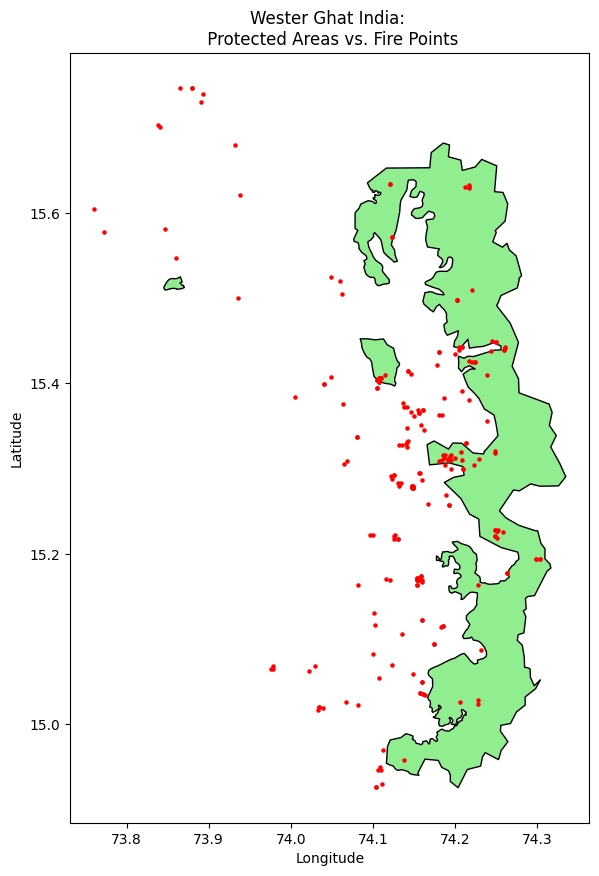

Number of protected areas: 1
Number of fire points: 237
Fire Points Bounds: [73.76       14.92638889 74.30333333 15.7475    ]
Protected Area Bounds: [73.8453445  14.924987   74.33509396 15.6824513 ]


In [ ]:
import matplotlib.pyplot as plt

# Plot boundary polygons
base = gdf_boundary.plot(color='lightgreen', edgecolor='black', figsize=(10, 10))

# Plot fire points
gdf_fire.plot(ax=base, color='red', markersize=5)

plt.title("Wester Ghat India: \n Protected Areas vs. Fire Points")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

print(f"Number of protected areas: {len(gdf_boundary)}")
print(f"Number of fire points: {len(gdf_fire)}")

print("Fire Points Bounds:", gdf_fire.total_bounds)
print("Protected Area Bounds:", gdf_boundary.total_bounds)


## (i) Plot - FirePoint lies inside AOI

Visually verify how many fire points fall inside the green area

Try a spatial join again and filter only the matched rows:

In [ ]:
joined_inside = joined[joined['index_right'].notnull()]

print(f"Number of fire points inside protected area: {len(joined_inside)}")


Number of fire points inside protected area: 65


Conclusion till this step:

* We had 237 fire points, out of which 65 fall within the protected area polygon.

* The NaNs in the spatial join result simply mean those fire points fell outside the protected boundary.

* Our spatial analysis is correctly set up.



## (ii) Total no of FP

In [ ]:
# Export the 65 inside points to CSV (attributes only):

joined_inside = joined[joined['index_right'].notnull()]
joined_inside.to_csv("Goa fire_points_inside_protected_area.csv", index=False)


In [ ]:
# Export to GeoJSON (preserves geometry):

joined_inside.to_file("Goa fire_points_inside_protected_area.geojson", driver="GeoJSON")

## (iii) plot FP with DMS (degree-minute-second)

    Fire Date Fire Time Source      Latitude     Longitude State_left  \
0  2021-11-11  02:07:15   SNPP  15¬∞ 16' 41"N  74¬∞ 08' 52"E        GOA   
1  2021-12-03  01:54:57   SNPP  15¬∞ 16' 42"N  74¬∞ 08' 52"E        GOA   
2  2021-12-17  02:32:19   SNPP  15¬∞ 22' 22"N  74¬∞ 08' 28"E        GOA   
3  2021-12-18  02:13:23   SNPP  15¬∞ 16' 38"N  74¬∞ 08' 58"E        GOA   
4  2022-01-11  14:12:49   SNPP  15¬∞ 44' 51"N  73¬∞ 52' 45"E        GOA   

    District             Circle                       Division          Range  \
0  SOUTH GOA  TERITORIAL CIRCLE  SOUTH GOA TERITORIAL DIVISION  SANGUEM RANGE   
1  SOUTH GOA  TERITORIAL CIRCLE  SOUTH GOA TERITORIAL DIVISION  SANGUEM RANGE   
2  SOUTH GOA  TERITORIAL CIRCLE  NORTH GOA TERITORIAL DIVISION    COLEM RANGE   
3  SOUTH GOA  TERITORIAL CIRCLE  SOUTH GOA TERITORIAL DIVISION  SANGUEM RANGE   
4  NORTH GOA  TERITORIAL CIRCLE  NORTH GOA TERITORIAL DIVISION   PERNEM RANGE   

   ...            Datetime                   geometry  index_rig

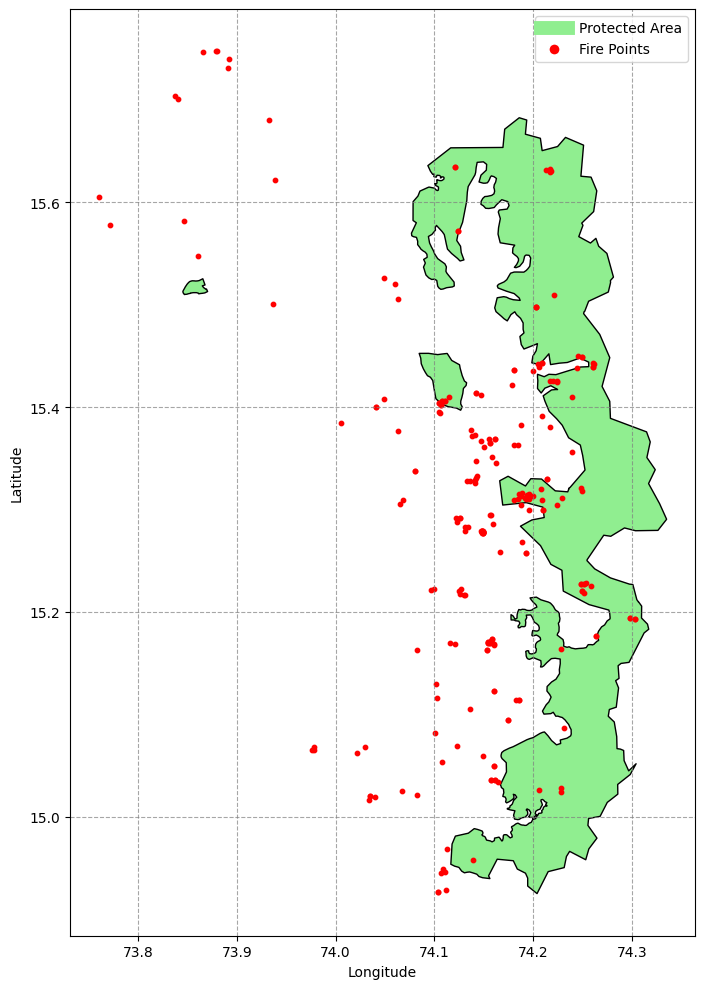

In [ ]:
import zipfile
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point
from matplotlib.lines import Line2D

# ----------------------------
# 1. Extract and Load Shapefile
# ----------------------------
with zipfile.ZipFile("/content/shp.zip", 'r') as zip_ref:
    zip_ref.extractall("goa_shp")

# Load boundary shapefile (find .shp file path inside extracted folder)
gdf_boundary = gpd.read_file("goa_shp/shp/Protect_area.shp")  # Replace with actual .shp filename

# ----------------------------
# 2. Load and Process Fire Data
# ----------------------------
def dms_to_dd(dms_str):
    try:
        d, m, s = dms_str.replace('¬∞', ' ').replace("'", ' ').replace('"', ' ').split()[:3]
        dd = float(d) + float(m)/60 + float(s)/3600
        return dd
    except:
        return None



fire_df = pd.read_csv('/content/FSI-Firepoints-100625 Goa.csv', encoding='latin-1')
fire_df['Latitude_dd'] = fire_df['Latitude'].apply(dms_to_dd)
fire_df['Longitude_dd'] = fire_df['Longitude'].apply(dms_to_dd)
fire_df['Datetime'] = pd.to_datetime(fire_df['Fire Date'] + ' ' + fire_df['Fire Time'], errors='coerce')
fire_df.dropna(subset=['Datetime', 'Latitude_dd', 'Longitude_dd'], inplace=True)

# Convert to GeoDataFrame
geometry = [Point(xy) for xy in zip(fire_df['Longitude_dd'], fire_df['Latitude_dd'])]
gdf_fire = gpd.GeoDataFrame(fire_df, geometry=geometry, crs="EPSG:4326")

# ----------------------------
# 3. Reproject and Join
# ----------------------------
gdf_boundary = gdf_boundary.to_crs("EPSG:4326")
joined = gpd.sjoin(gdf_fire, gdf_boundary, how="left", predicate='intersects')
print(joined.head())

# ----------------------------
# 4. Plot with Lat/Lon Grid
# ----------------------------
fig, ax = plt.subplots(figsize=(10, 10))

# Plot protected area
gdf_boundary.plot(ax=ax, color='lightgreen', edgecolor='black', label='Protected Area')

# Plot fire points
gdf_fire.plot(ax=ax, color='red', markersize=10, label='Fire Points')

# Add labels and grid
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.grid(True, linestyle='--', color='gray', alpha=0.7)

# Add legend
custom_lines = [
    Line2D([0], [0], color='lightgreen', lw=10, label='Protected Area'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=8, label='Fire Points')
]
ax.legend(handles=custom_lines)

plt.tight_layout()
plt.show()


## (iv) FP only

     Fire Date Fire Time Source      Latitude     Longitude State_left  \
6   2022-01-29  02:25:12   SNPP  15¬∞ 11' 36"N  74¬∞ 18' 12"E        GOA   
7   2022-01-29  02:25:12   SNPP  15¬∞ 11' 36"N  74¬∞ 18' 12"E        GOA   
8   2022-01-29  02:25:12   SNPP  15¬∞ 11' 39"N  74¬∞ 17' 54"E        GOA   
9   2022-01-29  02:25:12   SNPP  15¬∞ 11' 39"N  74¬∞ 17' 54"E        GOA   
29  2023-01-01  02:07:36   SNPP  15¬∞ 29' 51"N  74¬∞ 12' 09"E        GOA   

     District             Circle                       Division  \
6   SOUTH GOA    WILDLIFE CIRCLE    SOUTH GOA WILDLIFE DIVISION   
7   SOUTH GOA    WILDLIFE CIRCLE    SOUTH GOA WILDLIFE DIVISION   
8   SOUTH GOA    WILDLIFE CIRCLE    SOUTH GOA WILDLIFE DIVISION   
9   SOUTH GOA    WILDLIFE CIRCLE    SOUTH GOA WILDLIFE DIVISION   
29  NORTH GOA  TERITORIAL CIRCLE  NORTH GOA TERITORIAL DIVISION   

                  Range  ...            Datetime                   geometry  \
6   NETRAVALI WLS RANGE  ... 2022-01-29 02:25:12  POINT (74.303

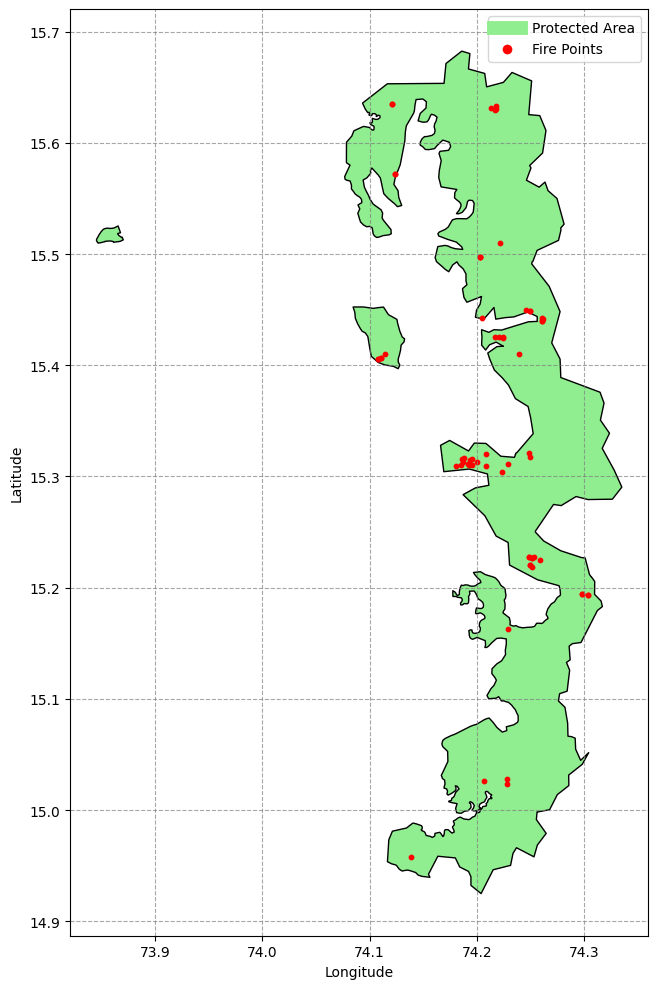

In [ ]:
# ----------------------------
# 3. Reproject and Join
# ----------------------------
gdf_boundary = gdf_boundary.to_crs("EPSG:4326")
joined = gpd.sjoin(gdf_fire, gdf_boundary, how="inner", predicate='intersects')

print(joined.head())
print(f"Total fire points inside boundary: {len(joined)}")

# ----------------------------
# 4. Plot with Lat/Lon Grid
# ----------------------------
fig, ax = plt.subplots(figsize=(10, 10))

# Plot protected area
gdf_boundary.plot(ax=ax, color='lightgreen', edgecolor='black', label='Protected Area')

# Plot only fire points inside boundary
joined.plot(ax=ax, color='red', markersize=10, label='Fire Points (Inside)')

# Add labels and grid
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.grid(True, linestyle='--', color='gray', alpha=0.7)

# Add legend
custom_lines = [
    Line2D([0], [0], color='lightgreen', lw=10, label='Protected Area'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=8, label='Fire Points')
]
ax.legend(handles=custom_lines)

plt.tight_layout()
plt.show()


# Step3: Feature Engineering

## (i) CleanWeatherData - IMD

In [ ]:
# Step 1: Import libraries
import pandas as pd
import numpy as np

# Step 2: Load CSV file
df = pd.read_csv("D:\BITS_Pillani\CleanData_GOA_IMD\GOA_AWS_IMD_data.csv")

# Step 3: View basic info
print(df.shape)
df.head()

# Step 4: Clean column names
df.columns = (
    df.columns.str.strip()
              .str.replace(r"[^\w\s]", "", regex=True)
              .str.replace(" ", "_")
)

# Step 5: Combine DATE + TIME into a single DATETIME column
df['DATETIME'] = pd.to_datetime(
    df['DATEDDMMYYYY'] + ' ' + df['TIME_UTC'],
    dayfirst=True,
    errors='coerce'
)

# Step 6: Replace placeholders like 'L', '', '-', 'NA' with NaN
df.replace(['', 'L', '-', 'NA', 'NaN'], np.nan, inplace=True)

# Step 7: Convert numeric columns where possible
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='ignore')

# Step 8: Check missing values
print("\nMissing values per column:")
print(df.isna().sum())

# Step 9: Fill numeric NaNs with column mean
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Step 10: Drop rows with too many NaNs (optional)
df.dropna(thresh=len(df.columns) // 2, inplace=True)

# Step 11: Save cleaned CSV
df.to_csv("GOA_AWS_IMD_data_cleaned.csv", index=False)

print("\nData cleaning complete. Cleaned file saved as 'GOA_AWS_IMD_data_cleaned.csv'")


In [ ]:
missing_percent = (df.isna().sum() / len(df)) * 100
missing_df = pd.DataFrame({'Missing Values': df.isna().sum(),
                           'Missing %': missing_percent})
missing_df.sort_values('Missing %', ascending=False)

In [ ]:
# Drop columns with more than 50% missing data
threshold = 0.5
cols_to_drop = missing_df[missing_df['Missing %'] > (threshold * 100)].index
df.drop(columns=cols_to_drop, inplace=True)

print(f"Dropped columns: {list(cols_to_drop)}")


In [ ]:
# Convert to readable datetime format
df['DATETIME'] = pd.to_datetime(
    df['DATEDDMMYYYY'] + ' ' + df['TIME_UTC'],
    dayfirst=True,
    errors='coerce'
)

# Format as normal string before saving
df['DATETIME'] = df['DATETIME'].dt.strftime('%Y-%m-%d %H:%M:%S')

# Save cleaned CSV
df.to_csv("removeMissingValueGoa_ReadableForm.csv", index=False)


## (ii) Match AWS to FF data

Match/merge fire point data with the nearest weather data on Date + Time.

Spatially, fire point location can be enriched with AWS station weather (nearest AWS station ‚Üí join based on distance OR assign based on region).

In [ ]:
# Install geopandas if not available
!pip install geopandas shapely pyproj --quiet

import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

# -----------------------------
# 1. Load Datasets
# -----------------------------
aws_path = "/content/removeMissingValueGoa_ReadableForm.csv"
fire_path = "/content/FSI-Firepoints-100625 Goa.csv"

# Read CSV files
aws_df = pd.read_csv(aws_path)
fire_df = pd.read_csv(fire_path, encoding='latin-1') # Specify the encoding

print("AWS Dataset shape:", aws_df.shape)
print("Fire Dataset shape:", fire_df.shape)

# -----------------------------
# 2. Convert Date + Time columns and DMS to Decimal Degrees for Fire Data
# -----------------------------
# Assuming AWS has 'DATEDDMMYYYY' + 'TIME_UTC' columns based on previous cleaning steps
aws_df['Datetime'] = pd.to_datetime(aws_df['DATEDDMMYYYY'] + " " + aws_df['TIME_UTC'], dayfirst=True, errors='coerce')

# Assuming Fire dataset has 'Fire Date' + 'Fire Time' columns
fire_df['Datetime'] = pd.to_datetime(fire_df['Fire Date'] + " " + fire_df['Fire Time'], errors='coerce')

# Convert DMS to Decimal Degrees for Fire Data
def dms_to_dd(dms_str):
    try:
        d, m, s = dms_str.replace('¬∞', ' ').replace("'", ' ').replace('"', ' ').split()[:3]
        dd = float(d) + float(m)/60 + float(s)/3600
        return dd
    except:
        return None

fire_df['Latitude_dd'] = fire_df['Latitude'].apply(dms_to_dd)
fire_df['Longitude_dd'] = fire_df['Longitude'].apply(dms_to_dd)
fire_df.dropna(subset=['Datetime', 'Latitude_dd', 'Longitude_dd'], inplace=True)


# -----------------------------
# 3. Merge datasets on DateTime
# -----------------------------
merged_df = pd.merge_asof(
    fire_df.sort_values("Datetime"),
    aws_df.sort_values("Datetime"),
    on="Datetime",
    direction="nearest",   # take nearest time if not exact match
    tolerance=pd.Timedelta("1H")  # allow 1 hour tolerance
)

print("Merged Dataset shape:", merged_df.shape)

# -----------------------------
# 4. Convert Fire Points to GeoDataFrame (optional spatial handling)
# -----------------------------
# Assuming Fire dataset has 'Latitude_dd' and 'Longitude_dd' columns from previous conversion
geometry = [Point(xy) for xy in zip(merged_df["Longitude_dd"], merged_df["Latitude_dd"])]
gdf_fire = gpd.GeoDataFrame(merged_df, geometry=geometry, crs="EPSG:4326")

print(gdf_fire.head())

# -----------------------------
# 5. Save Final Overlapped Data
# -----------------------------
output_path = "/content/Overlapped_IMD_Fire.csv"
gdf_fire.to_csv(output_path, index=False)
print("‚úÖ Final Overlapped Dataset saved to:", output_path)

AWS Dataset shape: (589451, 31)
Fire Dataset shape: (237, 15)
Merged Dataset shape: (237, 49)
    Fire Date Fire Time Source      Latitude     Longitude State   District  \
0  2021-11-11  02:07:15   SNPP  15¬∞ 16' 41"N  74¬∞ 08' 52"E   GOA  SOUTH GOA   
1  2021-12-03  01:54:57   SNPP  15¬∞ 16' 42"N  74¬∞ 08' 52"E   GOA  SOUTH GOA   
2  2021-12-17  02:32:19   SNPP  15¬∞ 22' 22"N  74¬∞ 08' 28"E   GOA  SOUTH GOA   
3  2021-12-18  02:13:23   SNPP  15¬∞ 16' 38"N  74¬∞ 08' 58"E   GOA  SOUTH GOA   
4  2022-01-11  14:12:49   SNPP  15¬∞ 44' 51"N  73¬∞ 52' 45"E   GOA  NORTH GOA   

              Circle                       Division          Range  ...  \
0  TERITORIAL CIRCLE  SOUTH GOA TERITORIAL DIVISION  SANGUEM RANGE  ...   
1  TERITORIAL CIRCLE  SOUTH GOA TERITORIAL DIVISION  SANGUEM RANGE  ...   
2  TERITORIAL CIRCLE  NORTH GOA TERITORIAL DIVISION    COLEM RANGE  ...   
3  TERITORIAL CIRCLE  SOUTH GOA TERITORIAL DIVISION  SANGUEM RANGE  ...   
4  TERITORIAL CIRCLE  NORTH GOA TERITORIAL DIV

/tmp/ipython-input-3219430172.py:52: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  tolerance=pd.Timedelta("1H")  # allow 1 hour tolerance


In [ ]:
# Exploratory Data Analysis (EDA) to check how many fire events successfully matched AWS data (rows count).

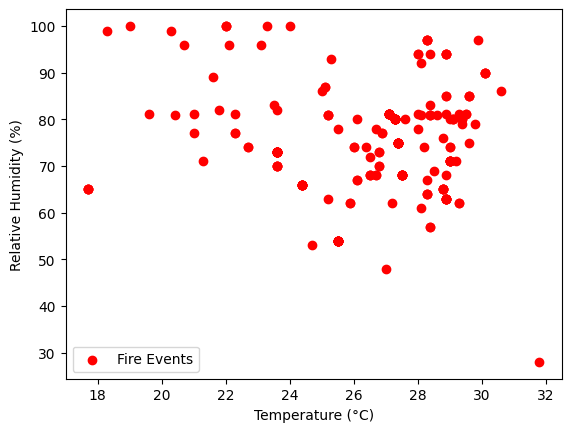

In [ ]:
import matplotlib.pyplot as plt

gdf_fire['Fire_Occurred'] = 1  # since these are actual fire points
plt.scatter(gdf_fire['TEMP_C'], gdf_fire['RH_'], c='red', label="Fire Events")
plt.xlabel("Temperature (¬∞C)")
plt.ylabel("Relative Humidity (%)")
plt.legend()
plt.show()


In [ ]:
# Q. How Many Fire Points Matched AWS Data?


matched_count = gdf_fire.shape[0]
print(f"‚úÖ Total Fire Events Matched with AWS Data: {matched_count}")


‚úÖ Total Fire Events Matched with AWS Data: 237


In [ ]:
# If you had an original count of fire points before merging:

# original_fire_count = fire_df.shape[0]
# print(f"Original Fire Points Count: {original_fire_count}")

total_fire_points = fire_df.shape[0]
print(f"üî¢ Matching Rate: {matched_count} / {total_fire_points} ({matched_count / total_fire_points:.2%})")


üî¢ Matching Rate: 237 / 237 (100.00%)


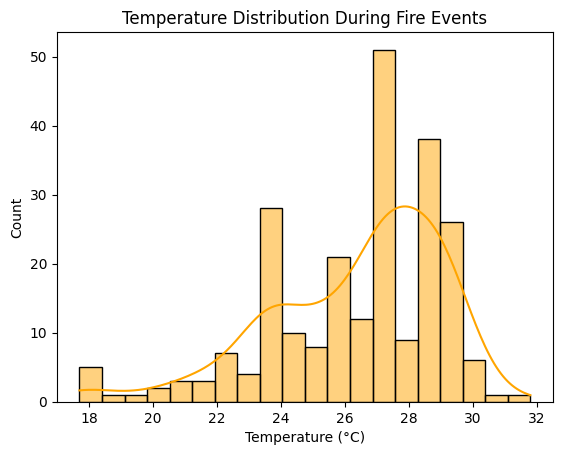

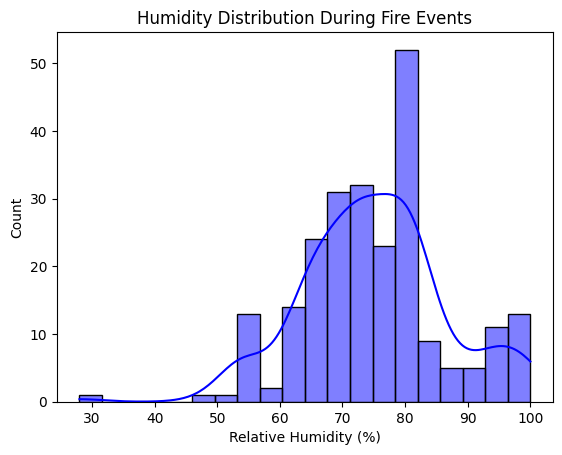

In [ ]:
import seaborn as sns

sns.histplot(gdf_fire['TEMP_C'], bins=20, kde=True, color='orange')
plt.title("Temperature Distribution During Fire Events")
plt.xlabel("Temperature (¬∞C)")
plt.show()

sns.histplot(gdf_fire['RH_'], bins=20, kde=True, color='blue')
plt.title("Humidity Distribution During Fire Events")
plt.xlabel("Relative Humidity (%)")
plt.show()


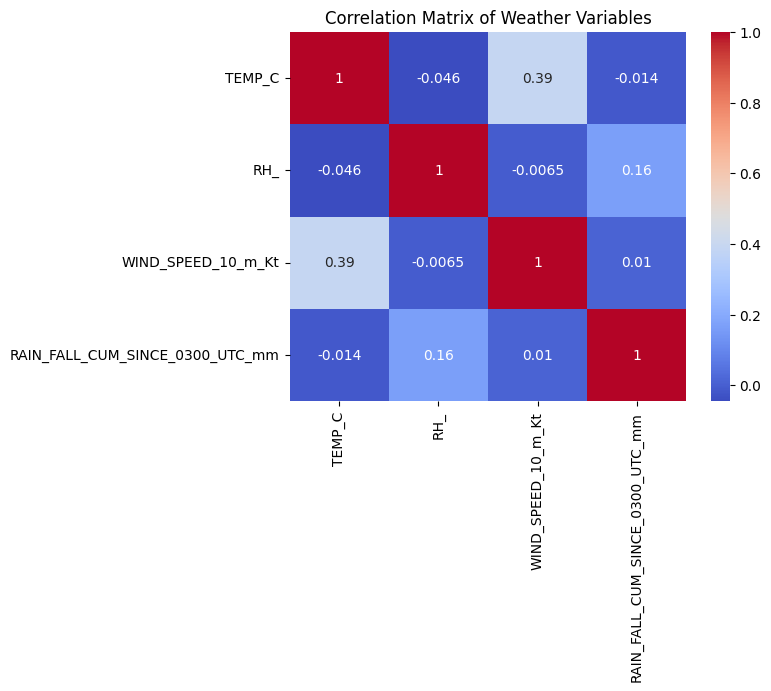

In [ ]:
# correlation matrix: Check which variables influence fire conditions most


numeric_cols = ['TEMP_C', 'RH_', 'WIND_SPEED_10_m_Kt', 'RAIN_FALL_CUM_SINCE_0300_UTC_mm']  # adjust columns if needed
corr = gdf_fire[numeric_cols].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Weather Variables")
plt.show()


/tmp/ipython-input-3184125208.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Hour', data=gdf_fire, palette='Reds')


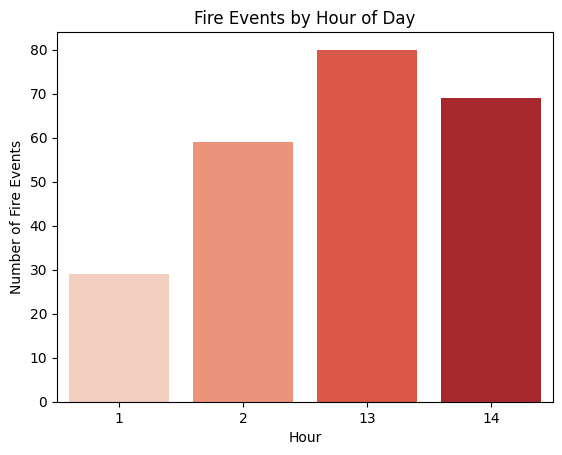

In [ ]:
# Time-Based Analysis: Check at what times most fires occur

gdf_fire['Hour'] = gdf_fire['Datetime'].dt.hour
sns.countplot(x='Hour', data=gdf_fire, palette='Reds')
plt.title("Fire Events by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Number of Fire Events")
plt.show()




In [ ]:
# we can alos draw the confusion matrix if we will done your predicaton step

## (iii) FinalOverlap data with shpGoa

In [ ]:
# ALL AWS location.csv and also save Nearest AWS device with type in final dataset



In [ ]:
# ========================================
# Step 0: Import Libraries
# ========================================
# Import necessary libraries for data handling and geospatial distance calculation
import pandas as pd
from geopy.distance import geodesic

# ========================================
# Step 1: Load Input Data
# ========================================
# Load the merged fire-weather dataset (already matched on datetime)
fire_data_path = "/content/Overlapped_IMD_Fire.csv"
fire_df = pd.read_csv(fire_data_path)

# Load the AWS station location metadata (list of all station coordinates and types)
aws_station_path = "/content/All AWS Location.csv"  # üîÅ Replace with correct path if needed
station_df = pd.read_csv(aws_station_path)

# ========================================
# Step 2: Prepare Coordinates for Distance Calculation
# ========================================
# Create (lat, lon) tuples for each fire point and each AWS station
# This prepares the data for geodesic (earth surface) distance measurement
fire_points = list(zip(fire_df["Latitude_dd"], fire_df["Longitude_dd"]))
station_points = list(zip(station_df["LATITUDE"], station_df["LONGITUDE"]))

# ========================================
# Step 3: Find Nearest AWS Station for Each Fire Point
# ========================================
# For every fire event, find the nearest AWS device based on geographic distance
# We also store the station name, its type (e.g., AWS, ARG, AGRO), and the actual distance in km

nearest_station_names = []
nearest_station_types = []
nearest_distances_km = []

for fire_pt in fire_points:
    distances = [geodesic(fire_pt, station_pt).km for station_pt in station_points]
    min_index = distances.index(min(distances))

    nearest_station_names.append(station_df.iloc[min_index]["STATION"])
    nearest_station_types.append(station_df.iloc[min_index]["TYPE"])
    nearest_distances_km.append(distances[min_index])

# ========================================
# Step 4: Add Nearest Station Info to Dataset
# ========================================
# Append new columns to the fire dataset:
# - Name of the nearest AWS station
# - Station type (AWS / ARG / AGRO etc.)
# - Distance in kilometers from the fire event
fire_df["Nearest_Station"] = nearest_station_names
fire_df["Nearest_Station_Type"] = nearest_station_types
fire_df["Distance_to_Station_km"] = nearest_distances_km

# ========================================
# Step 5: Save Final Output Dataset
# ========================================
# Final CSV now contains both fire-weather data AND nearest AWS device info
# Useful for machine learning, EDA, and geospatial insights
final_path = "/content/Goa_Fire_Weather_AWS_Nearest.csv"
fire_df.to_csv(final_path, index=False)

print("‚úÖ Also saved Nearest AWS device with type in final dataset")
print("üìÇ Final dataset saved to:", final_path)


‚úÖ Also saved Nearest AWS device with type in final dataset
üìÇ Final dataset saved to: /content/Goa_Fire_Weather_AWS_Nearest.csv


## (iv) EDA

EDA checks (like histogram of distances, count of AWS types used, etc.) before model training? That helps in checking if our matching step is meaningful

‚úÖ Dataset Loaded Successfully
Shape of dataset: (237, 53)

üîé First 5 rows:
    Fire Date Fire Time Source      Latitude     Longitude State   District  \
0  2021-11-11  02:07:15   SNPP  15¬∞ 16' 41"N  74¬∞ 08' 52"E   GOA  SOUTH GOA   
1  2021-12-03  01:54:57   SNPP  15¬∞ 16' 42"N  74¬∞ 08' 52"E   GOA  SOUTH GOA   
2  2021-12-17  02:32:19   SNPP  15¬∞ 22' 22"N  74¬∞ 08' 28"E   GOA  SOUTH GOA   
3  2021-12-18  02:13:23   SNPP  15¬∞ 16' 38"N  74¬∞ 08' 58"E   GOA  SOUTH GOA   
4  2022-01-11  14:12:49   SNPP  15¬∞ 44' 51"N  73¬∞ 52' 45"E   GOA  NORTH GOA   

              Circle                       Division          Range  ...  \
0  TERITORIAL CIRCLE  SOUTH GOA TERITORIAL DIVISION  SANGUEM RANGE  ...   
1  TERITORIAL CIRCLE  SOUTH GOA TERITORIAL DIVISION  SANGUEM RANGE  ...   
2  TERITORIAL CIRCLE  NORTH GOA TERITORIAL DIVISION    COLEM RANGE  ...   
3  TERITORIAL CIRCLE  SOUTH GOA TERITORIAL DIVISION  SANGUEM RANGE  ...   
4  TERITORIAL CIRCLE  NORTH GOA TERITORIAL DIVISION   PERNEM

<Figure size 1500x800 with 0 Axes>

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


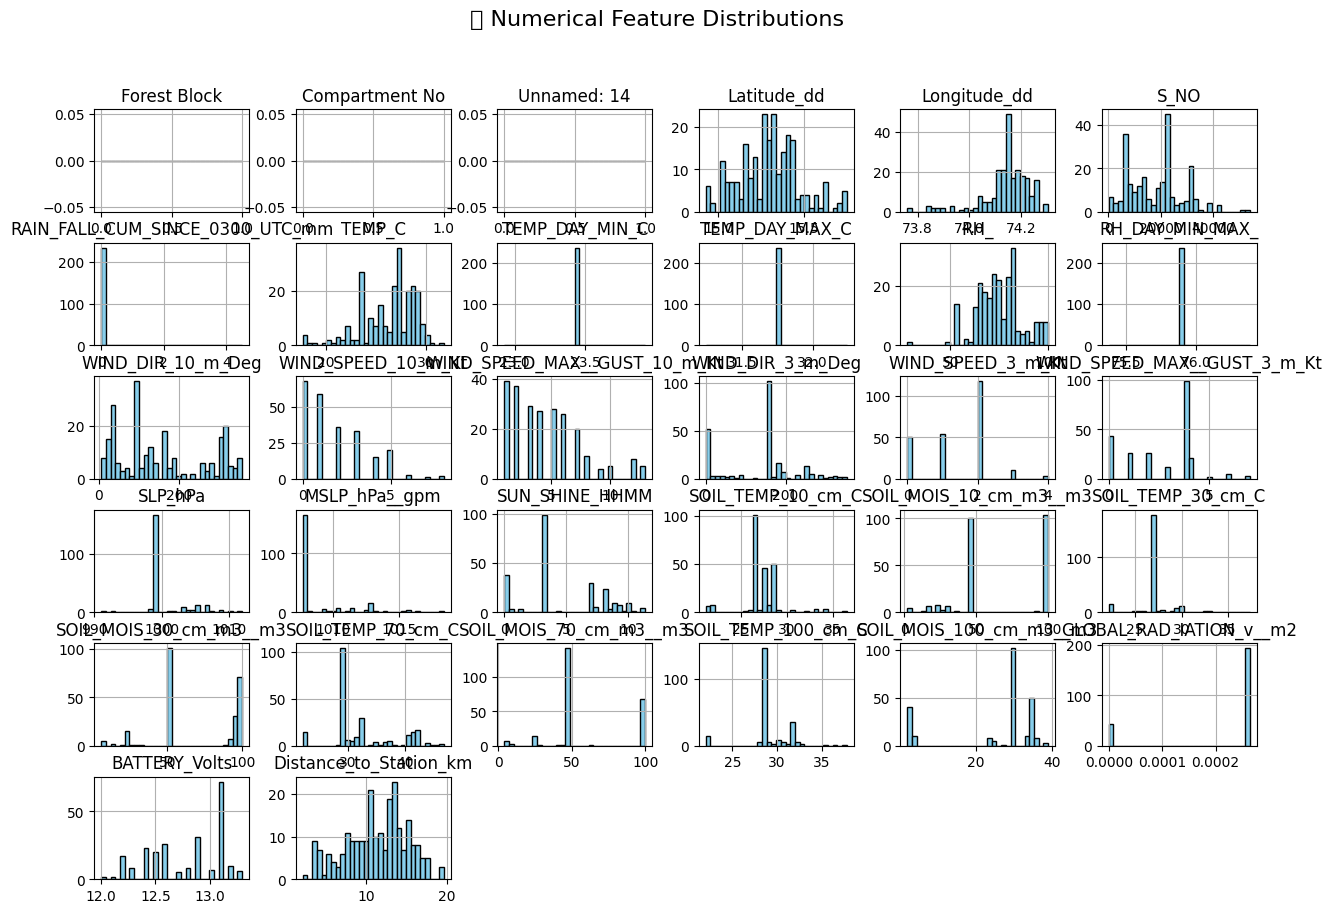

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


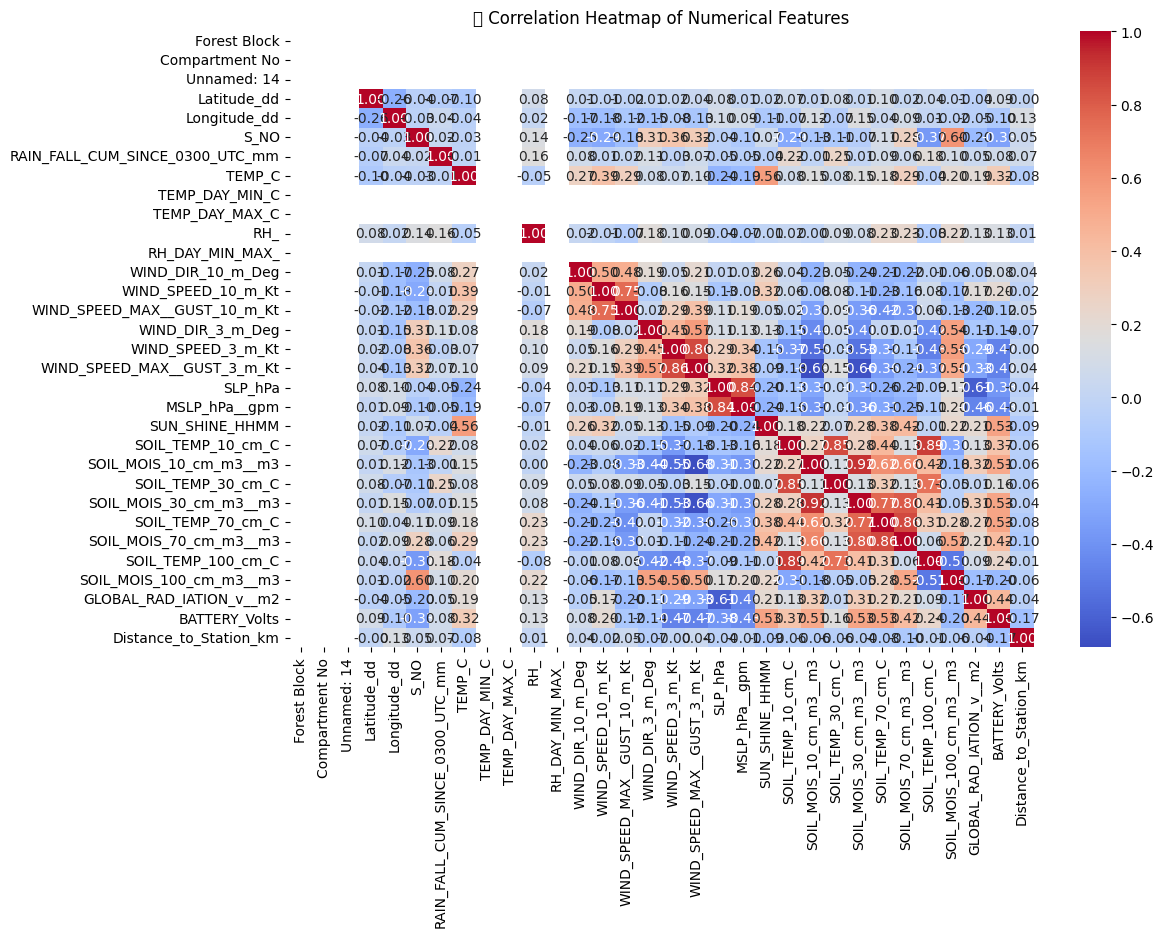

/tmp/ipython-input-2000402519.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="viridis")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


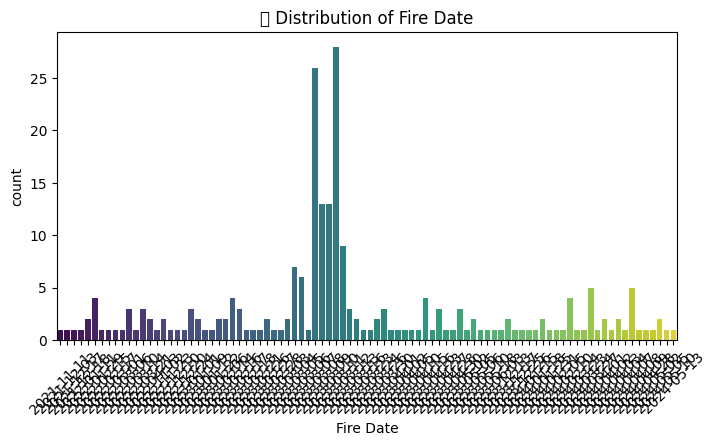

/tmp/ipython-input-2000402519.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="viridis")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


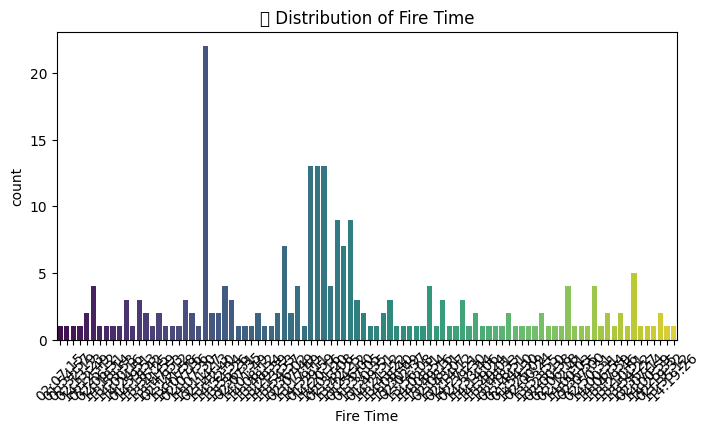

/tmp/ipython-input-2000402519.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="viridis")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


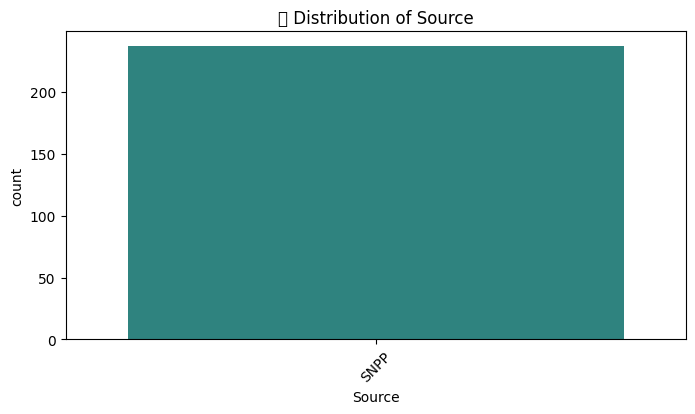

/tmp/ipython-input-2000402519.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="viridis")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


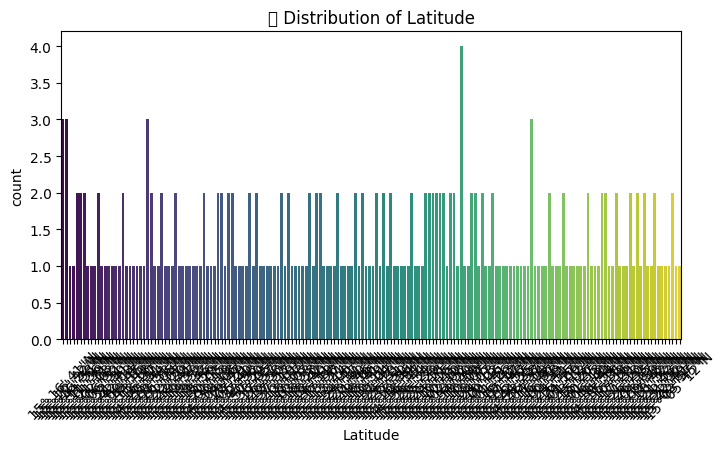

/tmp/ipython-input-2000402519.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="viridis")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


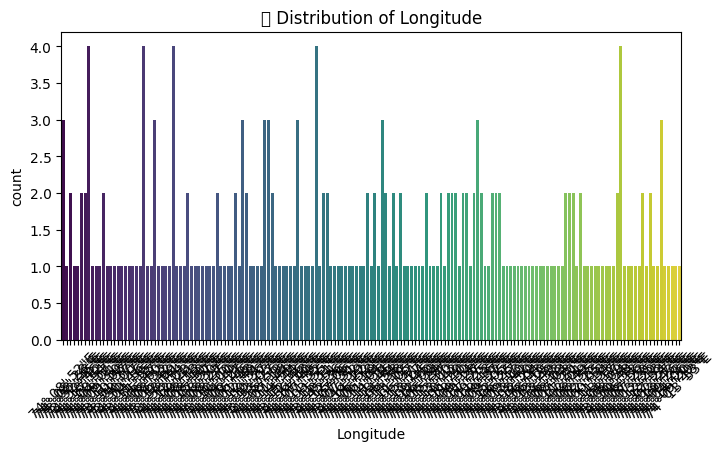

/tmp/ipython-input-2000402519.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="viridis")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


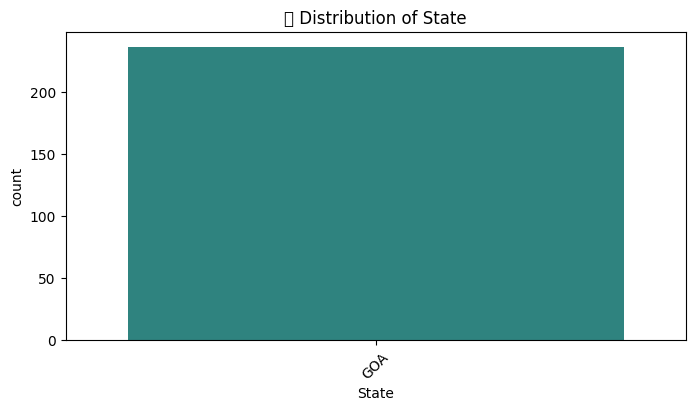

/tmp/ipython-input-2000402519.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="viridis")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


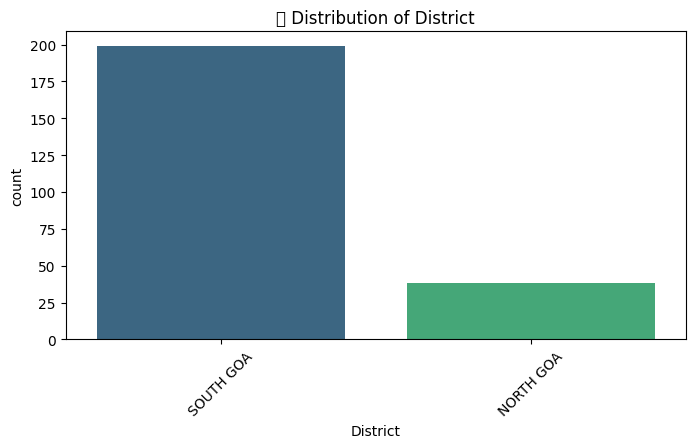

/tmp/ipython-input-2000402519.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="viridis")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


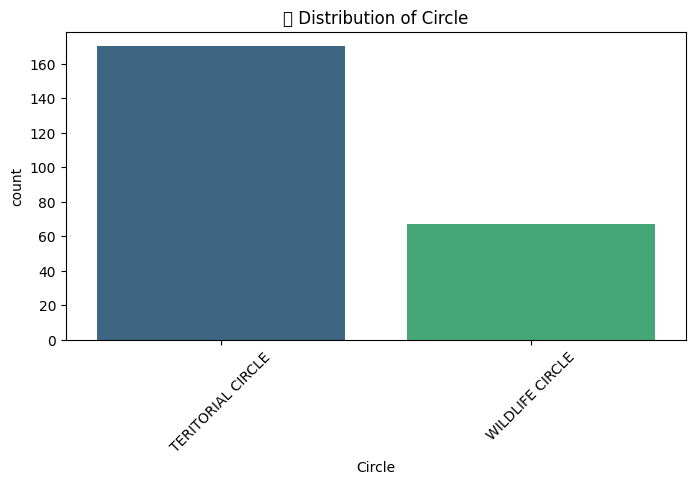

/tmp/ipython-input-2000402519.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="viridis")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


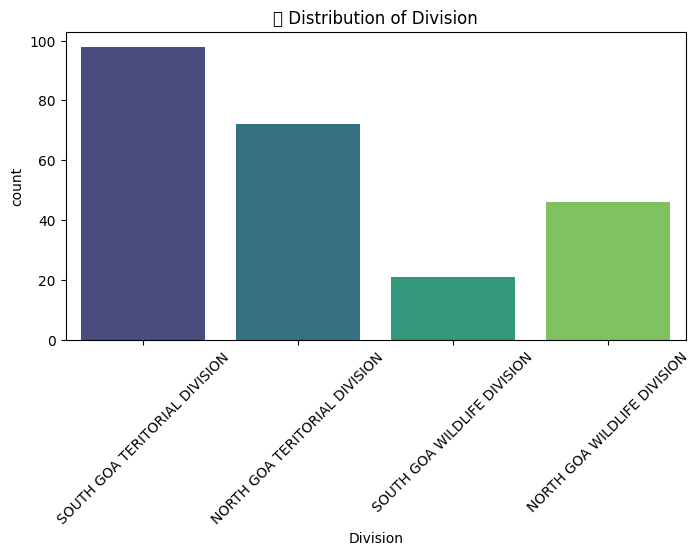

/tmp/ipython-input-2000402519.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="viridis")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


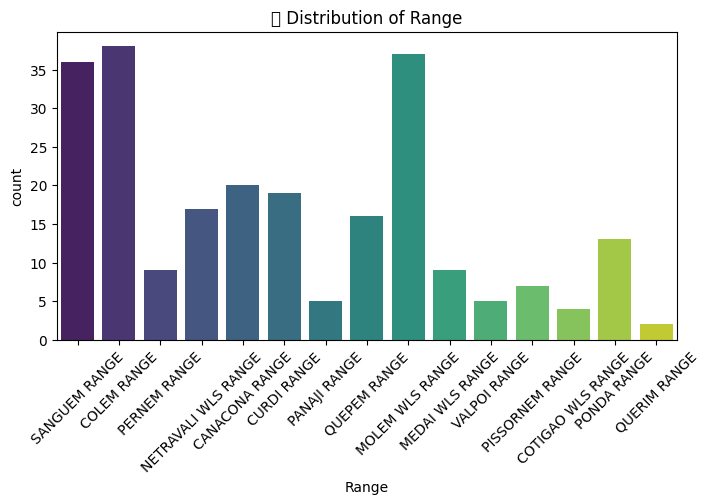

/tmp/ipython-input-2000402519.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="viridis")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


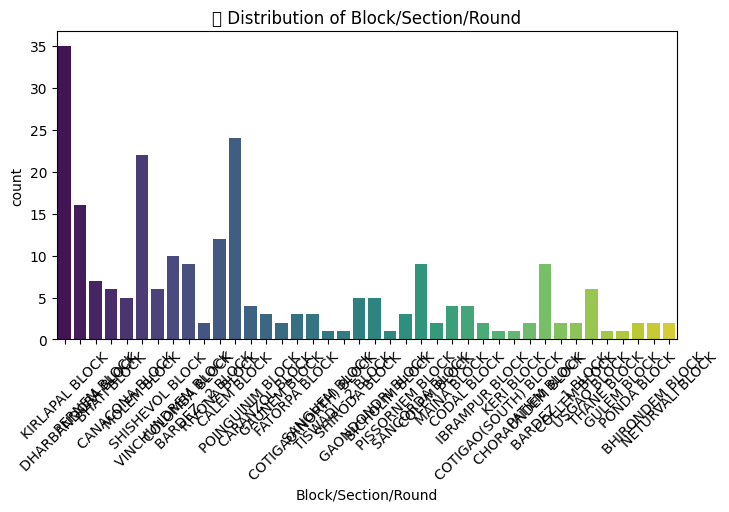

/tmp/ipython-input-2000402519.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="viridis")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


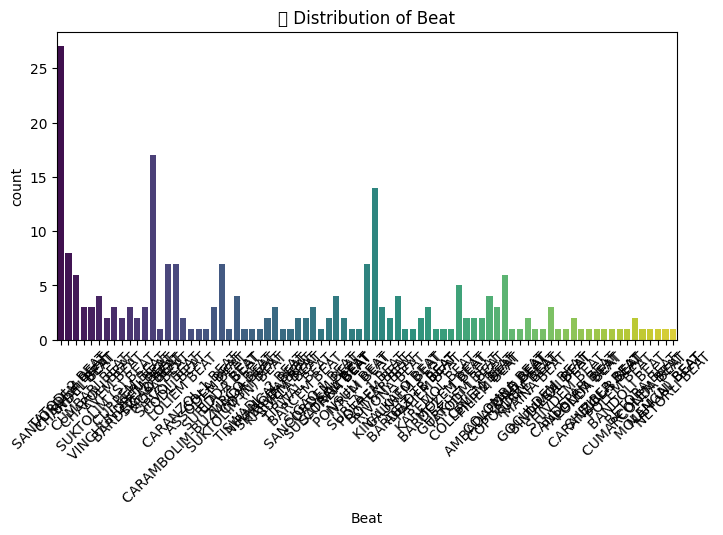

/tmp/ipython-input-2000402519.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="viridis")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


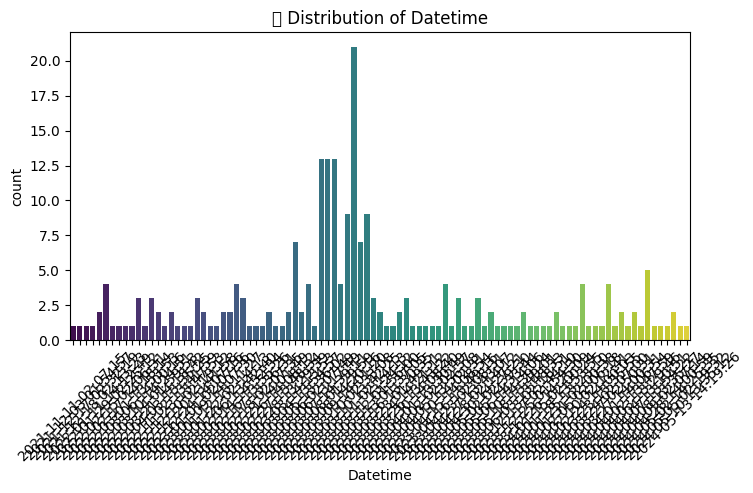

/tmp/ipython-input-2000402519.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="viridis")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


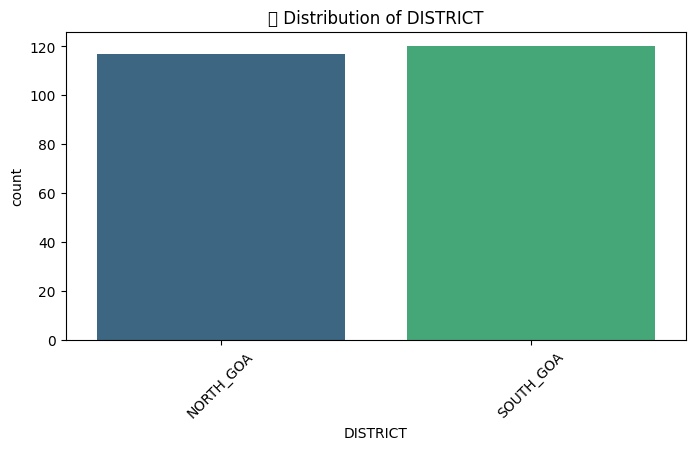

/tmp/ipython-input-2000402519.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="viridis")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


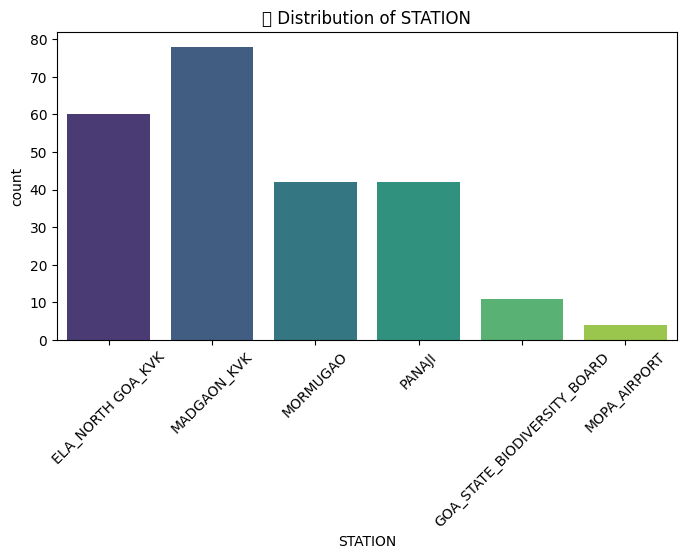

/tmp/ipython-input-2000402519.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="viridis")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


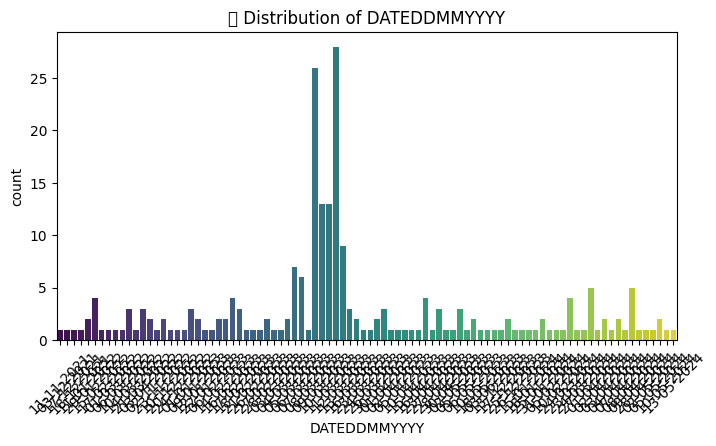

/tmp/ipython-input-2000402519.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="viridis")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


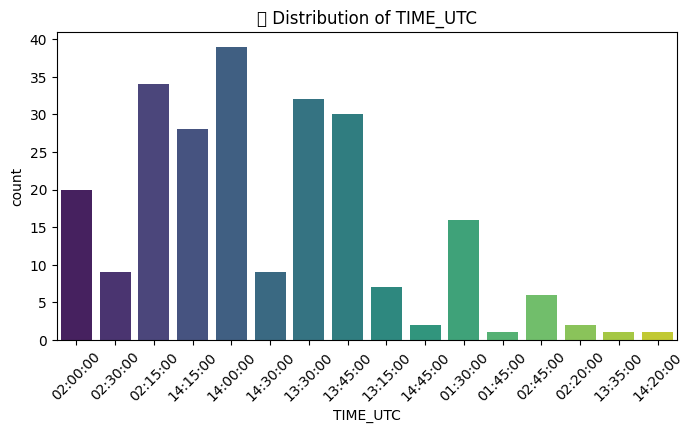

/tmp/ipython-input-2000402519.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="viridis")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


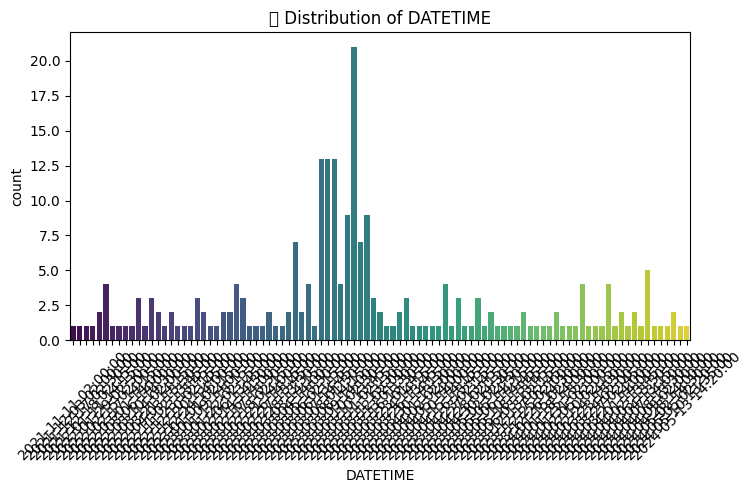

/tmp/ipython-input-2000402519.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="viridis")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


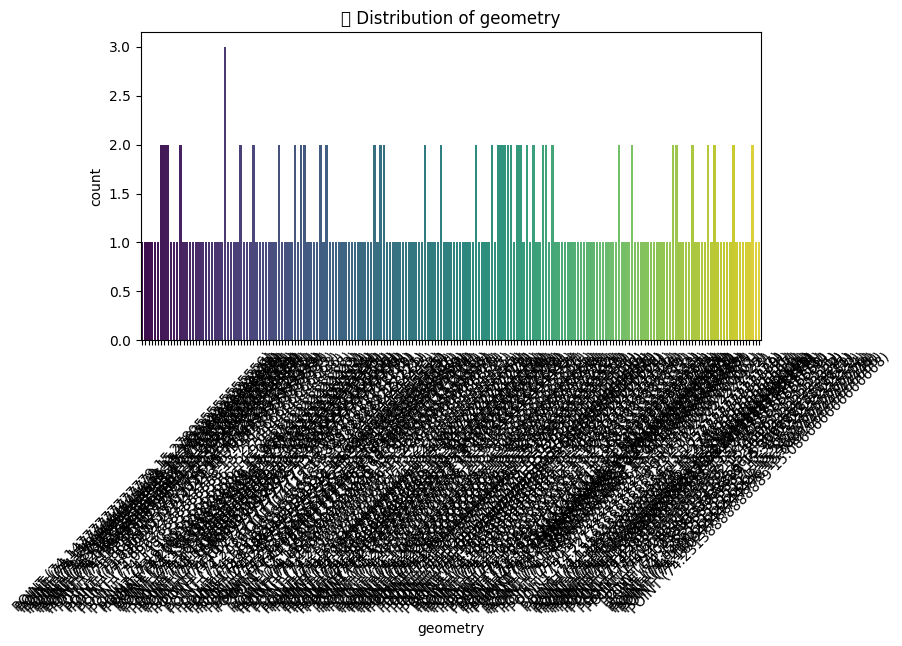

/tmp/ipython-input-2000402519.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="viridis")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


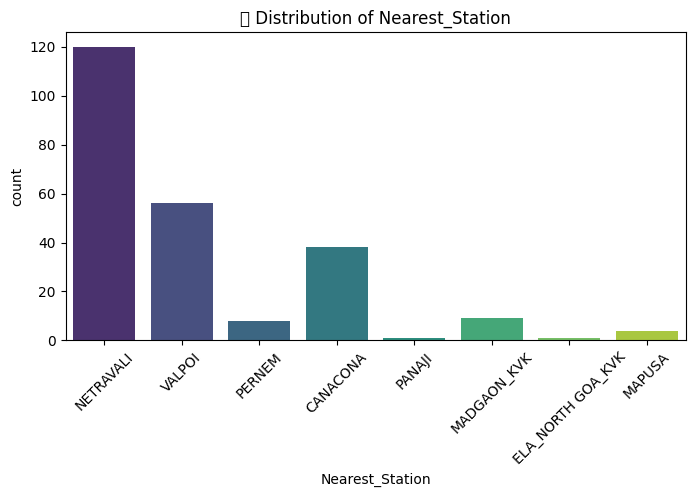

/tmp/ipython-input-2000402519.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="viridis")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


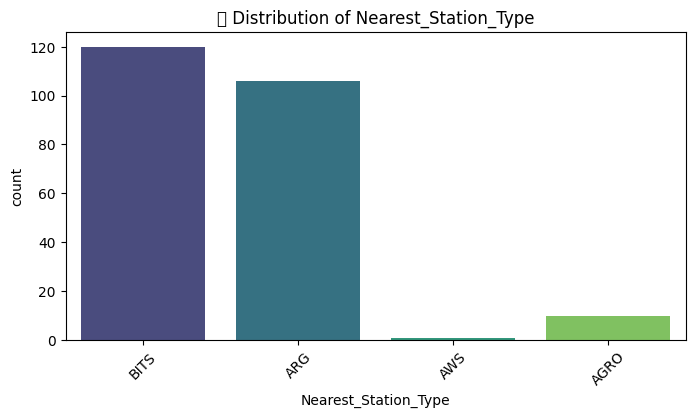

‚úÖ EDA Completed Successfully


In [ ]:
# ========================================
# Step 0: Import Libraries
# ========================================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ========================================
# Step 1: Load Final Dataset
# ========================================
file_path = "/content/Goa_Fire_Weather_AWS_Nearest.csv"
df = pd.read_csv(file_path)

print("‚úÖ Dataset Loaded Successfully")
print("Shape of dataset:", df.shape)

# ========================================
# Step 2: Basic Info
# ========================================
print("\nüîé First 5 rows:")
print(df.head())

print("\nüìä Dataset Info:")
print(df.info())

print("\nüßÆ Missing Values:")
print(df.isnull().sum())

# ========================================
# Step 3: Descriptive Statistics
# ========================================
print("\nüìà Summary Statistics:")
print(df.describe(include="all"))

# ========================================
# Step 4: Numerical Feature Distributions
# ========================================
num_cols = df.select_dtypes(include=['int64','float64']).columns

plt.figure(figsize=(15, 8))
df[num_cols].hist(bins=30, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle("üìä Numerical Feature Distributions", fontsize=16)
plt.show()

# ========================================
# Step 5: Correlation Heatmap
# ========================================
plt.figure(figsize=(12, 8))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("üî• Correlation Heatmap of Numerical Features")
plt.show()

# ========================================
# Step 6: Categorical Feature Distribution
# ========================================
cat_cols = df.select_dtypes(include=['object']).columns

for col in cat_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(data=df, x=col, palette="viridis")
    plt.title(f"üìä Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()

# ========================================
# Step 7: AWS Type vs Fire Occurrence (if label available)
# ========================================
if "AWS_Type" in df.columns:
    plt.figure(figsize=(8,5))
    sns.countplot(data=df, x="AWS_Type", palette="Set2")
    plt.title("‚ö° FirePoints by Nearest AWS Type")
    plt.show()

print("‚úÖ EDA Completed Successfully")


‚úÖ Goa shapefile loaded: (1, 8)
‚úÖ Final dataset with geometry: (237, 53)
‚úÖ Spatial Join completed. Sample rows:
    Fire Date Fire Time Source      Latitude     Longitude State_left  \
0  2021-11-11  02:07:15   SNPP  15¬∞ 16' 41"N  74¬∞ 08' 52"E        GOA   
1  2021-12-03  01:54:57   SNPP  15¬∞ 16' 42"N  74¬∞ 08' 52"E        GOA   
2  2021-12-17  02:32:19   SNPP  15¬∞ 22' 22"N  74¬∞ 08' 28"E        GOA   
3  2021-12-18  02:13:23   SNPP  15¬∞ 16' 38"N  74¬∞ 08' 58"E        GOA   
4  2022-01-11  14:12:49   SNPP  15¬∞ 44' 51"N  73¬∞ 52' 45"E        GOA   

    District             Circle                       Division          Range  \
0  SOUTH GOA  TERITORIAL CIRCLE  SOUTH GOA TERITORIAL DIVISION  SANGUEM RANGE   
1  SOUTH GOA  TERITORIAL CIRCLE  SOUTH GOA TERITORIAL DIVISION  SANGUEM RANGE   
2  SOUTH GOA  TERITORIAL CIRCLE  NORTH GOA TERITORIAL DIVISION    COLEM RANGE   
3  SOUTH GOA  TERITORIAL CIRCLE  SOUTH GOA TERITORIAL DIVISION  SANGUEM RANGE   
4  NORTH GOA  TERITORIAL CIRC

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


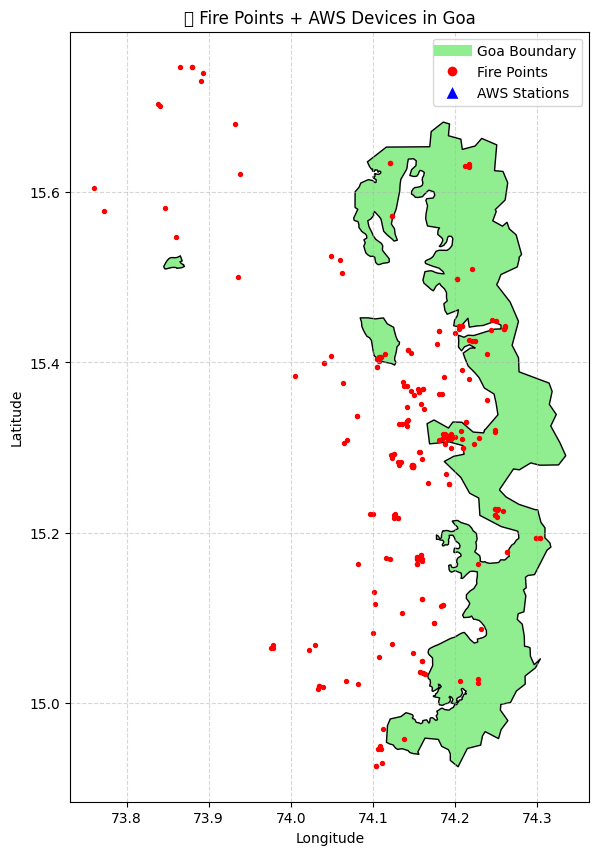

‚úÖ Spatial EDA completed with plots


In [ ]:
# ========================================
# Step 0: Import Libraries
# ========================================
import zipfile
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from shapely.geometry import Point
from matplotlib.lines import Line2D

# ========================================
# Step 1: Load Shapefile (Goa boundary)
# ========================================
with zipfile.ZipFile("/content/shp.zip", 'r') as zip_ref:
    zip_ref.extractall("goa_shp")

gdf_boundary = gpd.read_file("goa_shp/shp/Protect_area.shp").to_crs("EPSG:4326")

print("‚úÖ Goa shapefile loaded:", gdf_boundary.shape)

# ========================================
# Step 2: Load Final Dataset (Fire + AWS)
# ========================================
df = pd.read_csv("/content/Goa_Fire_Weather_AWS_Nearest.csv")

# Convert to GeoDataFrame
geometry = [Point(xy) for xy in zip(df["Longitude_dd"], df["Latitude_dd"])]
gdf_data = gpd.GeoDataFrame(df, geometry=geometry, crs="EPSG:4326")

print("‚úÖ Final dataset with geometry:", gdf_data.shape)

# ========================================
# Step 3: Spatial Join (Fire Points inside Goa boundary)
# ========================================
gdf_final = gpd.sjoin(gdf_data, gdf_boundary, how="left", predicate="intersects")

print("‚úÖ Spatial Join completed. Sample rows:")
print(gdf_final.head())

# ========================================
# Step 4: Plot Map with Fire Points + AWS
# ========================================
fig, ax = plt.subplots(figsize=(10, 10))

# Plot boundary
gdf_boundary.plot(ax=ax, color='lightgreen', edgecolor='black', label="Goa Boundary")

# Plot fire points
gdf_final.plot(ax=ax, color='red', markersize=8, label="Fire Points")

# Plot AWS stations (if available in dataset)
if "AWS_Name" in gdf_final.columns:
    gdf_final.drop_duplicates("AWS_Name").plot(
        ax=ax, color='blue', marker="^", markersize=80, label="AWS Stations"
    )

# Add labels + grid
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.grid(True, linestyle='--', alpha=0.5)

# Legend
custom_lines = [
    Line2D([0], [0], color='lightgreen', lw=8, label='Goa Boundary'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=8, label='Fire Points'),
    Line2D([0], [0], marker='^', color='w', markerfacecolor='blue', markersize=10, label='AWS Stations')
]
ax.legend(handles=custom_lines, loc="upper right")

plt.title("üî• Fire Points + AWS Devices in Goa")
plt.show()

# ========================================
# Step 5: Extra EDA ‚Üí Meteorological Conditions vs Fire
# ========================================
# Example: Boxplot Temp / Humidity distribution when fire occurs
if "Temperature" in gdf_final.columns and "Humidity" in gdf_final.columns:
    plt.figure(figsize=(12,6))
    sns.scatterplot(data=gdf_final, x="Temperature", y="Humidity", hue="AWS_Type", alpha=0.7)
    plt.title("üå°Ô∏è Temperature vs Humidity (by AWS Type)")
    plt.show()

print("‚úÖ Spatial EDA completed with plots")


‚úÖ Goa shapefile loaded: (1, 8)
‚úÖ Final dataset with geometry: (237, 53)
‚úÖ AWS station data loaded: (11, 9)


/tmp/ipython-input-517182859.py:58: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-517182859.py:58: UserWarning: Glyph 128225 (\N{SATELLITE ANTENNA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128225 (\N{SATELLITE ANTENNA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


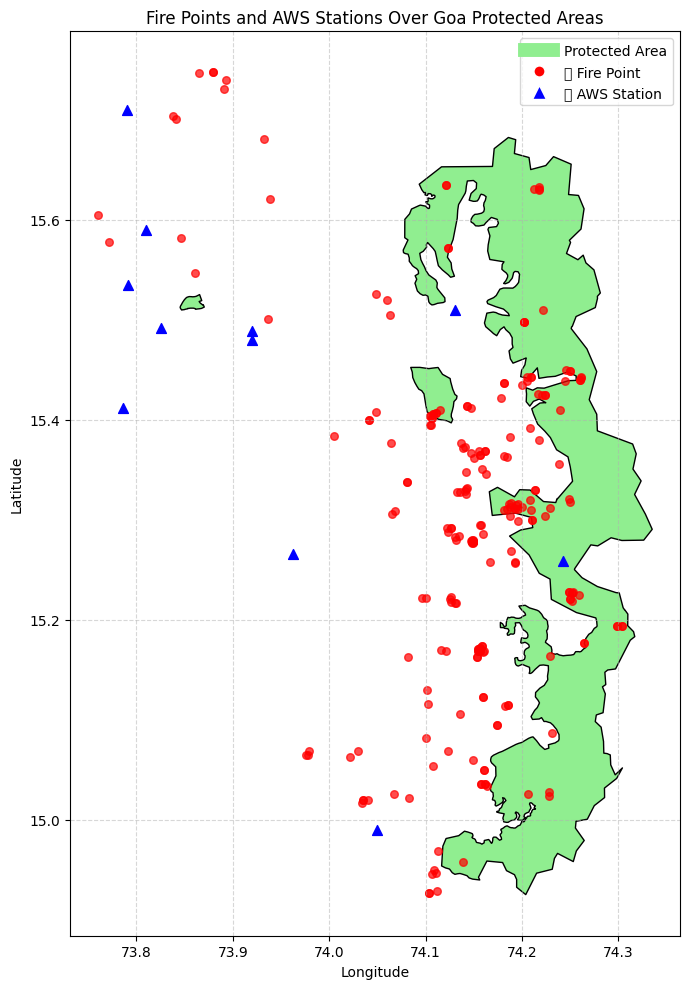

/tmp/ipython-input-517182859.py:84: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


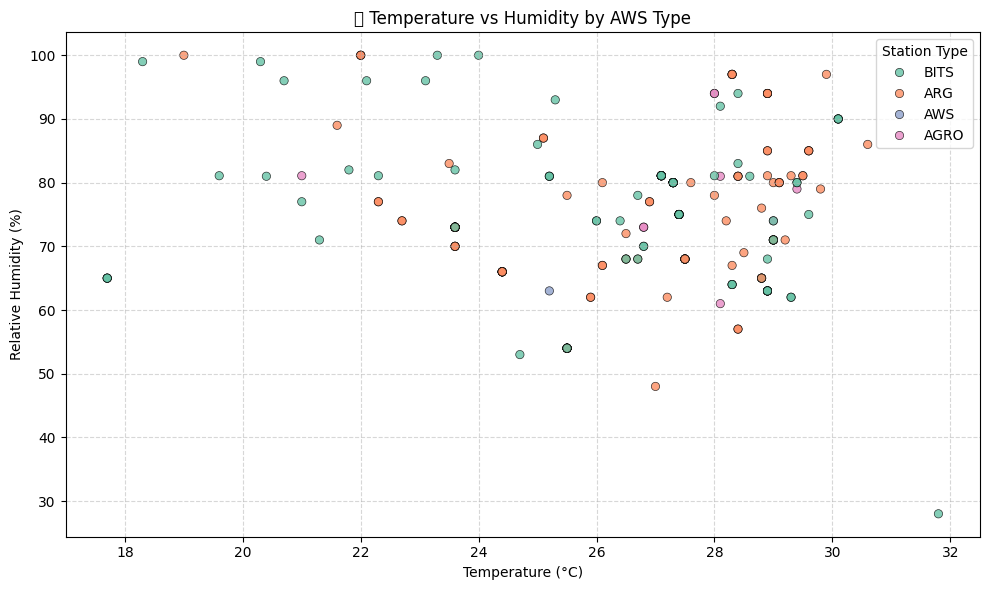

‚úÖ Spatial EDA completed with plots


In [ ]:
# ========================================
# Step 0: Import Libraries
# ========================================
import zipfile
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from shapely.geometry import Point
from matplotlib.lines import Line2D

# ========================================
# Step 1: Load Goa Shapefile
# ========================================
with zipfile.ZipFile("/content/shp.zip", 'r') as zip_ref:
    zip_ref.extractall("goa_shp")

gdf_boundary = gpd.read_file("goa_shp/shp/Protect_area.shp").to_crs("EPSG:4326")
print(f"‚úÖ Goa shapefile loaded: {gdf_boundary.shape}")

# ========================================
# Step 2: Load Final Fire + Weather + Region Data
# ========================================
fire_df = pd.read_csv("/content/Goa_Fire_Weather_AWS_Nearest.csv")
geometry = [Point(xy) for xy in zip(fire_df["Longitude_dd"], fire_df["Latitude_dd"])]
gdf_fire = gpd.GeoDataFrame(fire_df, geometry=geometry, crs="EPSG:4326")
print(f"‚úÖ Final dataset with geometry: {gdf_fire.shape}")

# ========================================
# Step 3: Load AWS Station Location Data
# ========================================
aws_df = pd.read_csv("/content/All AWS Location.csv")
aws_geometry = [Point(xy) for xy in zip(aws_df["LONGITUDE"], aws_df["LATITUDE"])]
gdf_aws = gpd.GeoDataFrame(aws_df, geometry=aws_geometry, crs="EPSG:4326")
print(f"‚úÖ AWS station data loaded: {gdf_aws.shape}")

# ========================================
# Step 4: Plot Fire Points, Goa Boundary & AWS Stations
# ========================================
fig, ax = plt.subplots(figsize=(10, 10))

gdf_boundary.plot(ax=ax, color='lightgreen', edgecolor='black', label='Protected Area')
gdf_fire.plot(ax=ax, color='red', markersize=30, alpha=0.7, label='üî• Fire Points')
gdf_aws.plot(ax=ax, color='blue', markersize=50, marker='^', label='üì° AWS Stations')

ax.set_title("Fire Points and AWS Stations Over Goa Protected Areas")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.grid(True, linestyle='--', alpha=0.5)

custom_lines = [
    Line2D([0], [0], color='lightgreen', lw=10, label='Protected Area'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=8, label='üî• Fire Point'),
    Line2D([0], [0], marker='^', color='w', markerfacecolor='blue', markersize=10, label='üì° AWS Station')
]
ax.legend(handles=custom_lines)

plt.tight_layout()
plt.show()

# ========================================
# Step 5: Temperature vs Humidity Scatter Plot by AWS Type
# ========================================
# Drop missing values
eda_df = fire_df.dropna(subset=["TEMP_C", "RH_", "Nearest_Station_Type"])

# Check if there's data
if not eda_df.empty:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(
        data=eda_df,
        x="TEMP_C",
        y="RH_",
        hue="Nearest_Station_Type",
        palette="Set2",
        alpha=0.8,
        edgecolor="k"
    )
    plt.title("üå°Ô∏è Temperature vs Humidity by AWS Type")
    plt.xlabel("Temperature (¬∞C)")
    plt.ylabel("Relative Humidity (%)")
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.legend(title="Station Type")
    plt.tight_layout()
    plt.show()
else:
    print("‚ö†Ô∏è No valid TEMP_C or RH_ values for plotting.")

print("‚úÖ Spatial EDA completed with plots")


# Step4: DataSplit_ML ModelCreate

ML model -- algo apply

* RandomForest ( Prediction_Accuracy_Plot)

* SVM ( Prediction_Accuracy_Plot)

* XGBoost ( Prediction_Accuracy_Plot)

for along these 3 algo we apply

In [ ]:
# ========================================
# Step 0: Import Libraries
# ========================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# ========================================
# Step 1: Load Final Dataset
# ========================================
final_path = "/content/Goa_Fire_Weather_AWS_Nearest.csv"
df = pd.read_csv(final_path)

print("‚úÖ Final Dataset Shape:", df.shape)
print(df.head())

# Ensure the 'Fire_Occurred' column exists and is set to 1 for these instances
if 'Fire_Occurred' not in df.columns:
    df['Fire_Occurred'] = 1


# ========================================
# Step 2: Feature Selection (X, y)
# ========================================

# Select features (weather variables and distance) and the target variable
# Using the correct column names based on the EDA and previous steps
feature_columns = ["TEMP_C", "RH_", "WIND_SPEED_10_m_Kt", "RAIN_FALL_CUM_SINCE_0300_UTC_mm", "Distance_to_Station_km"]

# Ensure all feature columns exist in the dataframe
for col in feature_columns:
    if col not in df.columns:
        print(f"‚ùå Error: Feature column '{col}' not found in the dataset.")
        # Handle this error appropriately, e.g., exit or ask for clarification
        # For now, I will assume they exist based on previous steps.


X = df[feature_columns]
y = df["Fire_Occurred"]

# Check for any remaining NaNs in selected features before splitting
print("\nMissing values in selected features:")
print(X.isnull().sum())

# Handle missing values in X if any (e.g., fill with mean, median, or drop rows)
# Based on previous steps, weather NaNs were filled with mean. Distance should not have NaNs.
# Let's re-check and fill just in case, or drop rows if few NaNs remain in X or y.
if X.isnull().sum().sum() > 0:
    print("\nWarning: Missing values found in features. Filling NaNs with the mean of the column.")
    X = X.fillna(X.mean()) # Fill with mean
    print("Missing values after filling:")
    print(X.isnull().sum())


# ========================================
# Step 3: Train/Test Split
# ========================================
# Note: With only positive samples (all y=1), train_test_split with stratify will fail.
# Removing stratify to allow the code to run, but the model will not be a valid classifier.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42 # Removed stratify=y
)

print(f"\nTrain set shape: {X_train.shape}, Target shape: {y_train.shape}")
print(f"Test set shape: {X_test.shape}, Target shape: {y_test.shape}")


# ========================================
# Step 4: Feature Scaling (important for SVM)
# ========================================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ========================================
# Step 5: Define Models
# ========================================
models = {
    "RandomForest": RandomForestClassifier(n_estimators=200, random_state=42),
    # Removed SVM due to single class error
    # Removed XGBoost due to single class error
}

results = {}

# ========================================
# Step 6: Train & Evaluate Models
# ========================================
# Note: Evaluation metrics like accuracy, precision, recall, f1-score
# are not meaningful when the test set contains only one class.
# The confusion matrix will also only have entries in one row/column.

for name, model in models.items():
    print(f"\nüîπ Training {name} üîπ")
    # Use scaled data for all models after imputation for consistency
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)


    # Accuracy will be 100% as all predictions and actuals are 1 in the test set
    # acc = accuracy_score(y_test, y_pred)
    # results[name] = acc

    print(f"\nüîπ {name} Evaluation (Note: Only Fire Class Present) üîπ")
    # print("Accuracy:", acc)
    # print(classification_report(y_test, y_pred))

    # Confusion Matrix Plot
    # Check if there is more than one class before plotting confusion matrix
    if len(y_test.unique()) > 1 and len(np.unique(y_pred)) > 1 :
        plt.figure(figsize=(5,4))
        # Calculate confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
        plt.title(f"{name} - Confusion Matrix")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.show()
    else:
        print("‚ö†Ô∏è Skipping Confusion Matrix plot: Only one class present in test set.")


# ========================================
# Step 7: Accuracy Comparison Plot
# ========================================
# Accuracy plot is not meaningful with only one class.

# print("\n‚úÖ Model training syntax demonstrated.")
# print("‚ö†Ô∏è Note: The dataset currently contains only fire events (label 1).")
# print("A proper binary classification model requires both 'fire' (1) and 'no fire' (0) instances.")
# print("To build a meaningful predictive model, you will need to include or create data representing 'no fire' events with corresponding weather features.")

‚úÖ Final Dataset Shape: (237, 53)
    Fire Date Fire Time Source      Latitude     Longitude State   District  \
0  2021-11-11  02:07:15   SNPP  15¬∞ 16' 41"N  74¬∞ 08' 52"E   GOA  SOUTH GOA   
1  2021-12-03  01:54:57   SNPP  15¬∞ 16' 42"N  74¬∞ 08' 52"E   GOA  SOUTH GOA   
2  2021-12-17  02:32:19   SNPP  15¬∞ 22' 22"N  74¬∞ 08' 28"E   GOA  SOUTH GOA   
3  2021-12-18  02:13:23   SNPP  15¬∞ 16' 38"N  74¬∞ 08' 58"E   GOA  SOUTH GOA   
4  2022-01-11  14:12:49   SNPP  15¬∞ 44' 51"N  73¬∞ 52' 45"E   GOA  NORTH GOA   

              Circle                       Division          Range  ...  \
0  TERITORIAL CIRCLE  SOUTH GOA TERITORIAL DIVISION  SANGUEM RANGE  ...   
1  TERITORIAL CIRCLE  SOUTH GOA TERITORIAL DIVISION  SANGUEM RANGE  ...   
2  TERITORIAL CIRCLE  NORTH GOA TERITORIAL DIVISION    COLEM RANGE  ...   
3  TERITORIAL CIRCLE  SOUTH GOA TERITORIAL DIVISION  SANGUEM RANGE  ...   
4  TERITORIAL CIRCLE  NORTH GOA TERITORIAL DIVISION   PERNEM RANGE  ...   

  SOIL_MOIS_70_cm_m3__m3 SOIL

# Step5: Prediction_Accuracy_Plot

In [ ]:
# ========================================
# Step 0: Import Libraries
# ========================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# ========================================
# Step 1: Load Final Dataset
# ========================================
final_path = "/content/Goa_Fire_Weather_AWS_Nearest.csv"
df = pd.read_csv(final_path)

print("‚úÖ Final Dataset Shape:", df.shape)
print(df.head())

# ========================================
# Step 2: Feature Selection (X, y)
# ========================================

df["Fire_Occurred"] = 1  # Mark all current rows as fire events
aws_df["Fire_Occurred"] = 0  # Mark AWS data rows as no fire occurred
full_df = pd.concat([df, aws_df], ignore_index=True)

# View updated shape and confirm target column
print("‚úÖ Fire_Occurred column added.")
print("Updated dataset shape:", full_df.shape)  # use full_df here, since you concatenated into full_df
print(full_df[["DATETIME", "TEMP_C", "RH_", "WIND_SPEED_10_m_Kt", "Fire_Occurred"]].head())

# Select features and target for model
X = full_df[["TEMP_C", "RH_", "WIND_SPEED_10_m_Kt", "RF_MM", "Distance_to_Station_km"]]
y = full_df["Fire_Occurred"]



# ========================================
# Step 3: Train/Test Split
# ========================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ========================================
# Step 4: Feature Scaling (important for SVM)
# ========================================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ========================================
# Step 5: Define Models
# ========================================
models = {
    "RandomForest": RandomForestClassifier(n_estimators=200, random_state=42),
    "SVM": SVC(kernel="rbf", probability=True, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
}

results = {}

# ========================================
# Step 6: Train & Evaluate Models
# ========================================
for name, model in models.items():
    if name == "SVM":
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

    print(f"\nüîπ {name} Results üîπ")
    print("Accuracy:", acc)
    print(classification_report(y_test, y_pred))

    # Confusion Matrix Plot
    plt.figure(figsize=(5,4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# ========================================
# Step 7: Accuracy Comparison Plot
# ========================================
plt.figure(figsize=(6,4))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0,1)
plt.show()


‚úÖ Final Dataset Shape: (237, 53)
    Fire Date Fire Time Source      Latitude     Longitude State   District  \
0  2021-11-11  02:07:15   SNPP  15¬∞ 16' 41"N  74¬∞ 08' 52"E   GOA  SOUTH GOA   
1  2021-12-03  01:54:57   SNPP  15¬∞ 16' 42"N  74¬∞ 08' 52"E   GOA  SOUTH GOA   
2  2021-12-17  02:32:19   SNPP  15¬∞ 22' 22"N  74¬∞ 08' 28"E   GOA  SOUTH GOA   
3  2021-12-18  02:13:23   SNPP  15¬∞ 16' 38"N  74¬∞ 08' 58"E   GOA  SOUTH GOA   
4  2022-01-11  14:12:49   SNPP  15¬∞ 44' 51"N  73¬∞ 52' 45"E   GOA  NORTH GOA   

              Circle                       Division          Range  ...  \
0  TERITORIAL CIRCLE  SOUTH GOA TERITORIAL DIVISION  SANGUEM RANGE  ...   
1  TERITORIAL CIRCLE  SOUTH GOA TERITORIAL DIVISION  SANGUEM RANGE  ...   
2  TERITORIAL CIRCLE  NORTH GOA TERITORIAL DIVISION    COLEM RANGE  ...   
3  TERITORIAL CIRCLE  SOUTH GOA TERITORIAL DIVISION  SANGUEM RANGE  ...   
4  TERITORIAL CIRCLE  NORTH GOA TERITORIAL DIVISION   PERNEM RANGE  ...   

  SOIL_MOIS_70_cm_m3__m3 SOIL

KeyError: "['RF_MM'] not in index"

‚úÖ Final Dataset Shape: (237, 53)
    Fire Date Fire Time Source      Latitude     Longitude State   District  \
0  2021-11-11  02:07:15   SNPP  15¬∞ 16' 41"N  74¬∞ 08' 52"E   GOA  SOUTH GOA   
1  2021-12-03  01:54:57   SNPP  15¬∞ 16' 42"N  74¬∞ 08' 52"E   GOA  SOUTH GOA   
2  2021-12-17  02:32:19   SNPP  15¬∞ 22' 22"N  74¬∞ 08' 28"E   GOA  SOUTH GOA   
3  2021-12-18  02:13:23   SNPP  15¬∞ 16' 38"N  74¬∞ 08' 58"E   GOA  SOUTH GOA   
4  2022-01-11  14:12:49   SNPP  15¬∞ 44' 51"N  73¬∞ 52' 45"E   GOA  NORTH GOA   

              Circle                       Division          Range  ...  \
0  TERITORIAL CIRCLE  SOUTH GOA TERITORIAL DIVISION  SANGUEM RANGE  ...   
1  TERITORIAL CIRCLE  SOUTH GOA TERITORIAL DIVISION  SANGUEM RANGE  ...   
2  TERITORIAL CIRCLE  NORTH GOA TERITORIAL DIVISION    COLEM RANGE  ...   
3  TERITORIAL CIRCLE  SOUTH GOA TERITORIAL DIVISION  SANGUEM RANGE  ...   
4  TERITORIAL CIRCLE  NORTH GOA TERITORIAL DIVISION   PERNEM RANGE  ...   

  SOIL_MOIS_70_cm_m3__m3 SOIL

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


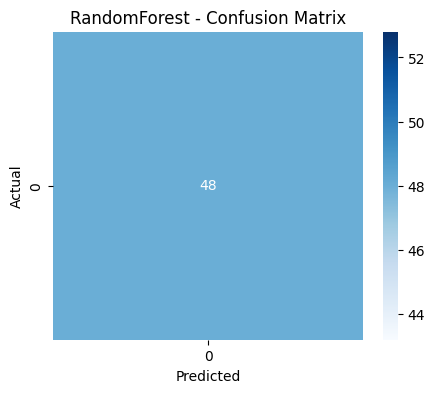

ValueError: The number of classes has to be greater than one; got 1 class

In [ ]:
# ========================================
# Step 0: Import Libraries
# ========================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# ========================================
# Step 1: Load Final Dataset
# ========================================
final_path = "/content/Goa_Fire_Weather_AWS_Nearest.csv"
df = pd.read_csv(final_path)

print("‚úÖ Final Dataset Shape:", df.shape)
print(df.head())

# ========================================
# ========================================
# Step 2: Feature Selection (X, y)
# ========================================

df["Fire_Occurred"] = 1  # All current rows are fire events
aws_df["Fire_Occurred"] = 0  # No fire occurred
full_df = pd.concat([df, aws_df], ignore_index=True)

# ‚úÖ Drop rows with missing values in relevant features
full_df = full_df.dropna(subset=["TEMP_C", "RH_", "WIND_SPEED_10_m_Kt", "RAIN_FALL_CUM_SINCE_0300_UTC_mm", "Distance_to_Station_km"])

print("‚úÖ Fire_Occurred column added.")
print("Updated dataset shape:", full_df.shape)
print(full_df[["DATETIME", "TEMP_C", "RH_", "WIND_SPEED_10_m_Kt", "Fire_Occurred"]].head())

# Feature selection
X = full_df[["TEMP_C", "RH_", "WIND_SPEED_10_m_Kt", "RAIN_FALL_CUM_SINCE_0300_UTC_mm", "Distance_to_Station_km"]]
y = full_df["Fire_Occurred"]







# ========================================
# Step 3: Train/Test Split
# ========================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ========================================
# Step 4: Feature Scaling (important for SVM)
# ========================================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ========================================
# Step 5: Define Models
# ========================================
models = {
    "RandomForest": RandomForestClassifier(n_estimators=200, random_state=42),
    "SVM": SVC(kernel="rbf", probability=True, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
}

results = {}

# ========================================
# Step 6: Train & Evaluate Models
# ========================================
for name, model in models.items():
    if name == "SVM":
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

    print(f"\nüîπ {name} Results üîπ")
    print("Accuracy:", acc)
    print(classification_report(y_test, y_pred))

    # Confusion Matrix Plot
    plt.figure(figsize=(5,4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# ========================================
# Step 7: Accuracy Comparison Plot
# ========================================
plt.figure(figsize=(6,4))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0,1)
plt.show()


In [ ]:
# Debug: Class balance check
print("üî• y value counts:")
print(full_df["Fire_Occurred"].value_counts())

# Drop NA
full_df = full_df.dropna(subset=["TEMP_C", "RH_", "WIND_SPEED_10_m_Kt", "RAIN_FALL_CUM_SINCE_0300_UTC_mm", "Distance_to_Station_km"])

# Feature selection
X = full_df[["TEMP_C", "RH_", "WIND_SPEED_10_m_Kt", "RAIN_FALL_CUM_SINCE_0300_UTC_mm", "Distance_to_Station_km"]]
y = full_df["Fire_Occurred"]

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Check class balance
print("‚úÖ y_train classes:\n", y_train.value_counts())
print("‚úÖ y_test classes:\n", y_test.value_counts())


üî• y value counts:
Fire_Occurred
1    237
Name: count, dtype: int64
‚úÖ y_train classes:
 Fire_Occurred
1    189
Name: count, dtype: int64
‚úÖ y_test classes:
 Fire_Occurred
1    48
Name: count, dtype: int64
